# NBA Player Stats Table Using Plottable

In [1]:
import pandas as pd

In [2]:
# EXPORT TO CSV
df_combined = pd.read_csv(r'x')
df_combined


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,sp_work_PACE,PIE,POSS,PTS_OFF_TOV,PTS_2ND_CHANCE,PTS_FB,PTS_PAINT,Season_Type,Game_Location,Wins
0,2023-24,1630228,Jonathan Kuminga,1610612744,GSW,Golden State Warriors,22300280,2023-12-02,GSW @ LAC,L,...,104.06,0.029,33,0,0,0,2,Regular Season,Away,0
1,2023-24,202397,Ish Smith,1610612766,CHA,Charlotte Hornets,22300281,2023-12-02,CHA vs. MIN,L,...,95.22,0.159,33,0,0,0,4,Regular Season,Home,0
2,2023-24,1628970,Miles Bridges,1610612766,CHA,Charlotte Hornets,22300281,2023-12-02,CHA vs. MIN,L,...,99.15,0.088,74,4,2,4,10,Regular Season,Home,0
3,2023-24,1626172,Kevon Looney,1610612744,GSW,Golden State Warriors,22300280,2023-12-02,GSW @ LAC,L,...,104.46,0.212,39,0,0,0,6,Regular Season,Away,0
4,2023-24,1631109,Mark Williams,1610612766,CHA,Charlotte Hornets,22300281,2023-12-02,CHA vs. MIN,L,...,90.88,0.048,56,2,2,2,8,Regular Season,Home,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207858,2015-16,101141,Ersan Ilyasova,1610612765,DET,Detroit Pistons,21500001,2015-10-27,DET @ ATL,W,...,103.16,0.103,74,0,3,0,4,Regular Season,Away,1
207859,2015-16,203488,Mike Muscala,1610612737,ATL,Atlanta Hawks,21500001,2015-10-27,ATL vs. DET,L,...,105.13,-0.154,17,0,0,0,0,Regular Season,Home,0
207860,2015-16,203934,Lamar Patterson,1610612737,ATL,Atlanta Hawks,21500001,2015-10-27,ATL vs. DET,L,...,102.30,0.057,37,3,0,0,0,Regular Season,Home,0
207861,2015-16,2594,Kyle Korver,1610612737,ATL,Atlanta Hawks,21500001,2015-10-27,ATL vs. DET,L,...,102.02,0.000,61,2,0,0,0,Regular Season,Home,0


In [3]:
from plottable import Table
pd.set_option('display.max_columns', None)
# Set display option to show full column width
pd.set_option('display.max_colwidth', None)


In [4]:
import pandas as pd
import numpy as np

# Define variables
ftm_column = 'FTM'
pts_column = 'PTS'

# Define the list of season years
season_years = ['2023-24', '2022-23', '2021-22', '2020-21', '2019-20']

# Initialize an empty DataFrame to store the results
top_players_by_season = pd.DataFrame()

# Loop through each season
for season_year in season_years:
    # Filter data for the specified season
    current_season_df = df_combined[df_combined['SEASON_YEAR'] == season_year].copy()

    # Clean player names (remove leading/trailing whitespaces)
    current_season_df['PLAYER_NAME'] = current_season_df['PLAYER_NAME'].str.strip()

    # Group by player and calculate average FTM and PTS per game
    average_stats_per_game = current_season_df.groupby('PLAYER_NAME').agg({ftm_column: 'mean', pts_column: 'mean'}).reset_index()

    # Drop rows with missing values in the FTM or PTS columns
    average_stats_per_game = average_stats_per_game.dropna(subset=[ftm_column, pts_column]).round(1)

    # Calculate the percentage of FTM by PTS as a float
    average_stats_per_game['FTM/PTS'] = average_stats_per_game[ftm_column] / average_stats_per_game[pts_column]

    # Replace non-finite values (NaN or inf) with a placeholder (e.g., -1)
    average_stats_per_game['FTM/PTS'] = average_stats_per_game['FTM/PTS'].replace([np.inf, -np.inf, np.nan], -1).round(2)

    # Sort the players by average FTM per game in descending order
    top_players = average_stats_per_game.sort_values(by=ftm_column, ascending=False).head(10)

    # Add the 'Season Year' column
    top_players['Season Year'] = season_year

    # Concatenate the results to the combined DataFrame
    top_players_by_season = pd.concat([top_players_by_season, top_players])

# Sort the combined DataFrame by average FTM per game in descending order
top_players_across_seasons = top_players_by_season.sort_values(by=ftm_column, ascending=False).head(10)

# Add a 'Rank' column starting from 1
top_players_across_seasons['Rank'] = range(1, len(top_players_across_seasons) + 1)

# Ensure FTM and PTS columns are numeric
top_players_across_seasons[ftm_column] = pd.to_numeric(top_players_across_seasons[ftm_column], errors='coerce')
top_players_across_seasons[pts_column] = pd.to_numeric(top_players_across_seasons[pts_column], errors='coerce')

# Remove the index
top_players_across_seasons = top_players_across_seasons.reset_index(drop=True)

# Reorder columns
column_order = ['Rank','PLAYER_NAME','Season Year','FTM', 'FTM/PTS', 'PTS']
top_players_across_seasons = top_players_across_seasons[column_order]

# Print the top players across seasons
print("Top 10 Players by FTM Across Seasons:")
top_players_across_seasons


Top 10 Players by FTM Across Seasons:


,Rank,PLAYER_NAME,Season Year,FTM,FTM/PTS,PTS
0,1,Joel Embiid,2023-24,10.3,0.32,32.0
1,2,James Harden,2019-20,10.2,0.30,34.3
2,3,Joel Embiid,2022-23,10.0,0.30,33.1
3,4,Shai Gilgeous-Alexander,2022-23,9.8,0.31,31.4
4,5,Joel Embiid,2021-22,9.6,0.31,30.6
5,6,Joel Embiid,2020-21,9.2,0.32,28.5
6,7,Damian Lillard,2022-23,8.8,0.27,32.2
7,8,Damian Lillard,2023-24,8.4,0.33,25.5
8,9,Giannis Antetokounmpo,2021-22,8.3,0.28,29.9
9,10,Trae Young,2023-24,8.2,0.31,26.8


In [5]:
from nba_api.stats.static import players
import pandas as pd

# Assuming you have a folder named 'output' with player images named by player ID
image_folder = r'C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots'

# Retrieve player IDs and names
nba_players_info = players.get_players()

# Convert the player info to a DataFrame for better handling
nba_players_df = pd.DataFrame(nba_players_info)

# Create a dictionary to map player IDs to image file names
player_id_to_image = {
    str(player['id']): str(player['id']) + '.png'
    for player in nba_players_info
}

# Add a new column to store image file paths or URLs
top_players_across_seasons['Image'] = top_players_across_seasons['PLAYER_NAME'].map(
    lambda player_name: image_folder + '/' + player_id_to_image.get(str(nba_players_df[nba_players_df['full_name'] == player_name]['id'].iloc[0]), 'Unknown.png')
)

# Print the top players across seasons with images
print("Top 10 Players by FTM Across Seasons:")
top_players_across_seasons

Top 10 Players by FTM Across Seasons:


,Rank,PLAYER_NAME,Season Year,FTM,FTM/PTS,PTS,Image
0,1,Joel Embiid,2023-24,10.3,0.32,32.0,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203954.png
1,2,James Harden,2019-20,10.2,0.30,34.3,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/201935.png
2,3,Joel Embiid,2022-23,10.0,0.30,33.1,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203954.png
3,4,Shai Gilgeous-Alexander,2022-23,9.8,0.31,31.4,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/1628983.png
4,5,Joel Embiid,2021-22,9.6,0.31,30.6,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203954.png
5,6,Joel Embiid,2020-21,9.2,0.32,28.5,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203954.png
6,7,Damian Lillard,2022-23,8.8,0.27,32.2,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203081.png
7,8,Damian Lillard,2023-24,8.4,0.33,25.5,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203081.png
8,9,Giannis Antetokounmpo,2021-22,8.3,0.28,29.9,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203507.png
9,10,Trae Young,2023-24,8.2,0.31,26.8,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/1629027.png


In [6]:
#rename & reorder columns 

top_players_across_seasons = top_players_across_seasons.rename(columns={
    'PLAYER_NAME': 'Player Name',
})

# Reorder columns
column_order = ['Rank','Player Name', 'Image','Season Year','FTM', 'FTM/PTS', 'PTS']
top_players_across_seasons = top_players_across_seasons[column_order]
top_players_across_seasons

,Rank,Player Name,Image,Season Year,FTM,FTM/PTS,PTS
0,1,Joel Embiid,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203954.png,2023-24,10.3,0.32,32.0
1,2,James Harden,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/201935.png,2019-20,10.2,0.30,34.3
2,3,Joel Embiid,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203954.png,2022-23,10.0,0.30,33.1
3,4,Shai Gilgeous-Alexander,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/1628983.png,2022-23,9.8,0.31,31.4
4,5,Joel Embiid,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203954.png,2021-22,9.6,0.31,30.6
5,6,Joel Embiid,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203954.png,2020-21,9.2,0.32,28.5
6,7,Damian Lillard,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203081.png,2022-23,8.8,0.27,32.2
7,8,Damian Lillard,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203081.png,2023-24,8.4,0.33,25.5
8,9,Giannis Antetokounmpo,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203507.png,2021-22,8.3,0.28,29.9
9,10,Trae Young,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/1629027.png,2023-24,8.2,0.31,26.8


In [7]:
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image # image

In [8]:
# Remove the index column
top_players_across_seasons = top_players_across_seasons.reset_index(drop=True)
top_players_across_seasons

,Rank,Player Name,Image,Season Year,FTM,FTM/PTS,PTS
0,1,Joel Embiid,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203954.png,2023-24,10.3,0.32,32.0
1,2,James Harden,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/201935.png,2019-20,10.2,0.30,34.3
2,3,Joel Embiid,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203954.png,2022-23,10.0,0.30,33.1
3,4,Shai Gilgeous-Alexander,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/1628983.png,2022-23,9.8,0.31,31.4
4,5,Joel Embiid,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203954.png,2021-22,9.6,0.31,30.6
5,6,Joel Embiid,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203954.png,2020-21,9.2,0.32,28.5
6,7,Damian Lillard,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203081.png,2022-23,8.8,0.27,32.2
7,8,Damian Lillard,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203081.png,2023-24,8.4,0.33,25.5
8,9,Giannis Antetokounmpo,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/203507.png,2021-22,8.3,0.28,29.9
9,10,Trae Young,C:\Users\cvald\OneDrive\LC 2023\NBA\Player Headshots/1629027.png,2023-24,8.2,0.31,26.8


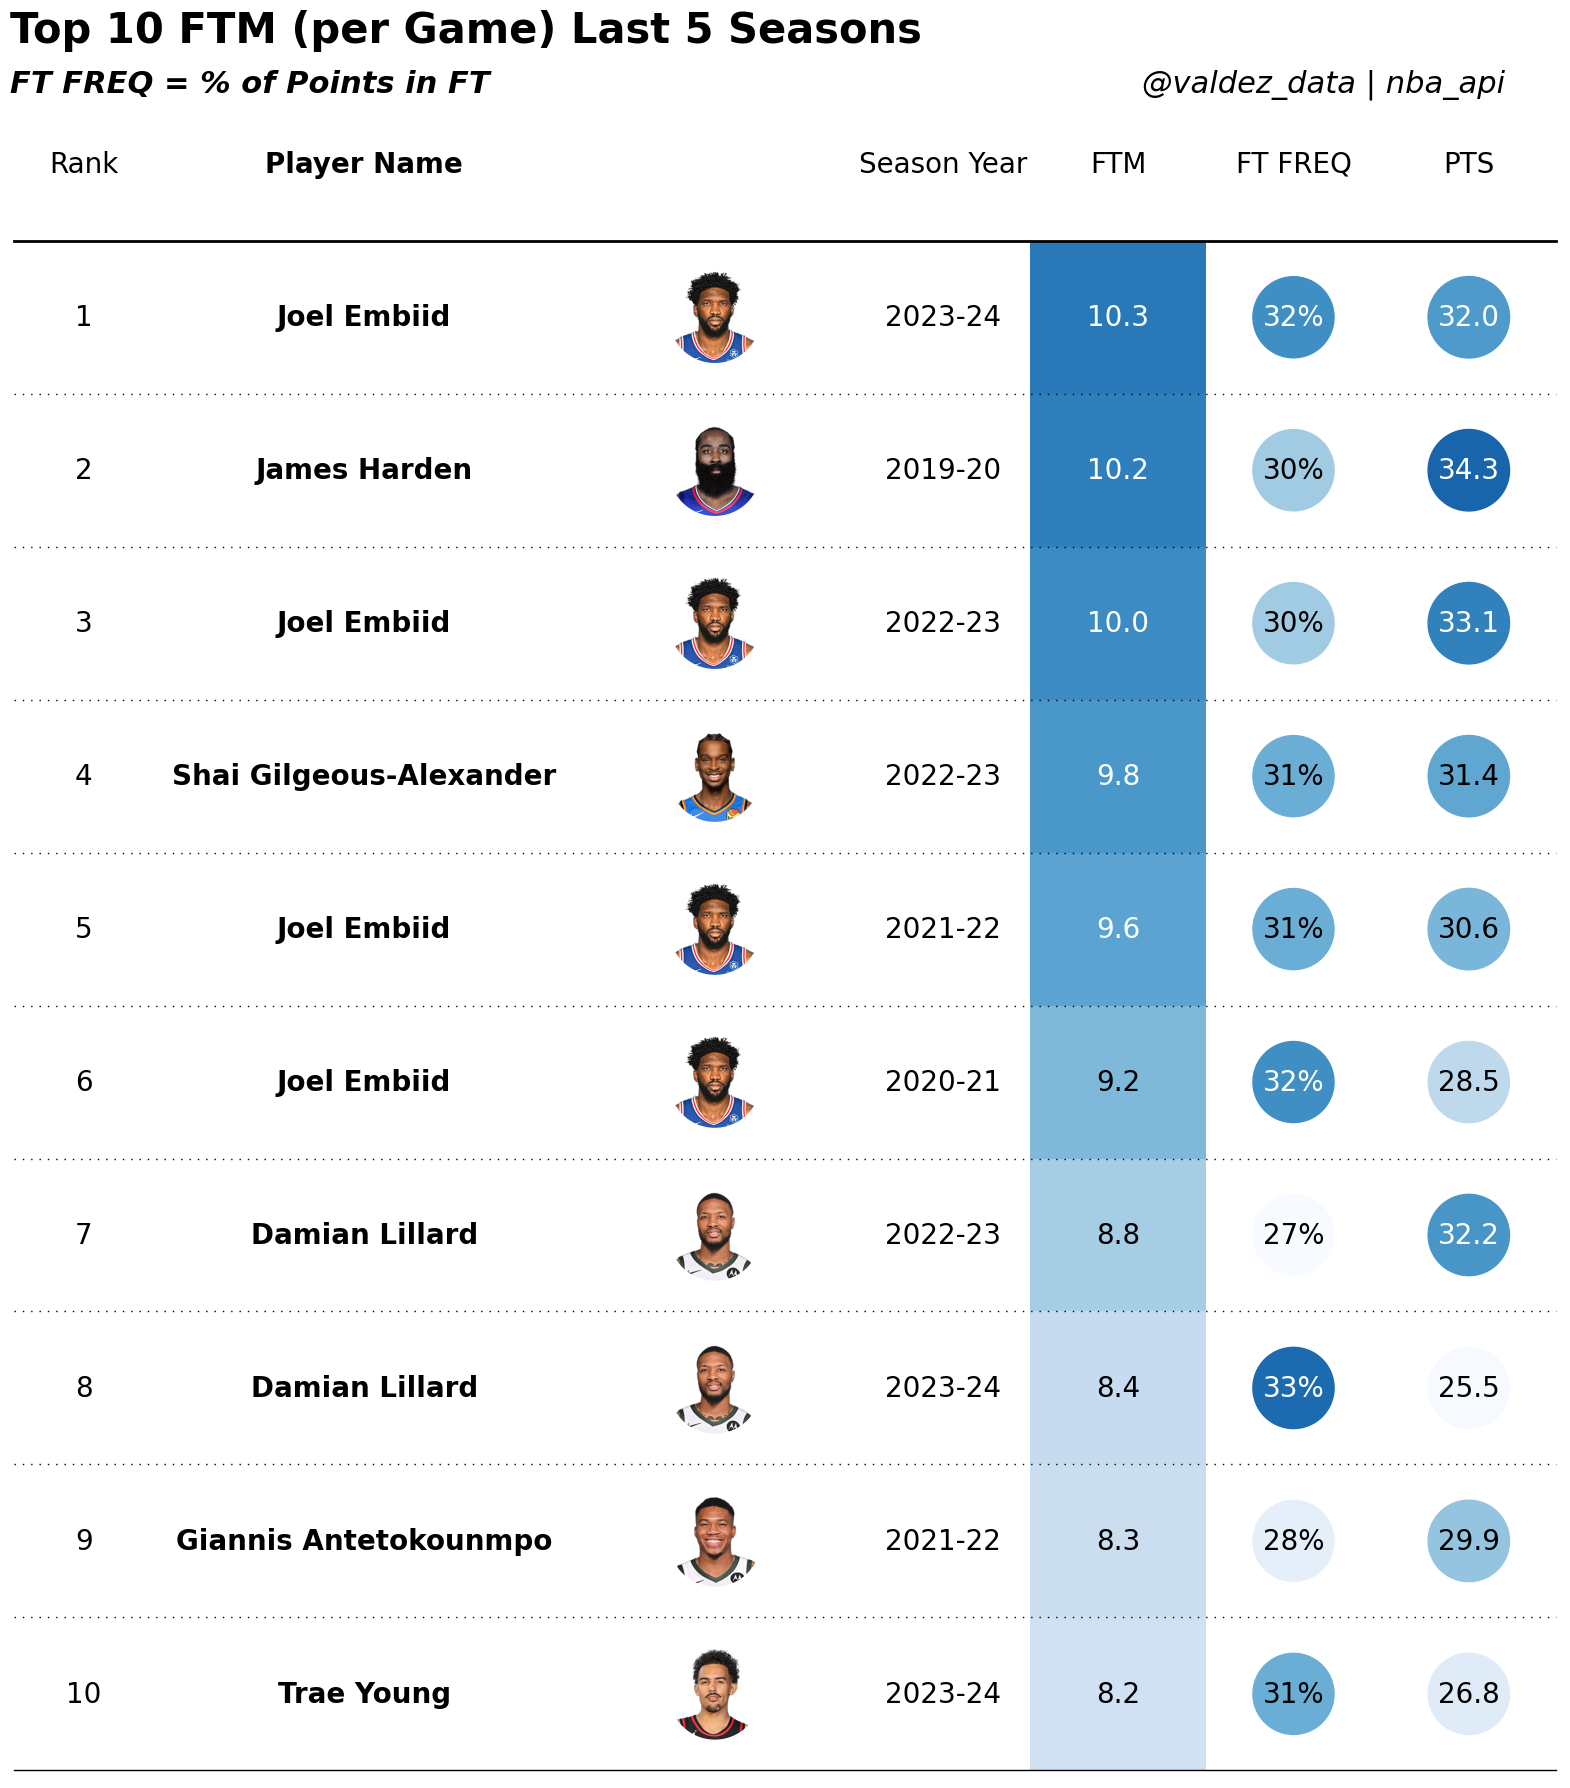

In [26]:
# change df name 
df = top_players_across_seasons


# Define columns from your DataFrame
rank_col = "Rank"
player_name_col = "Player Name"
image = 'Image'
season = "Season Year"
ftm_col = ftm_column
ftm_pts_col = "FTM/PTS"
pts_col = pts_column

# Column Definitions
col_defs = [
    ColumnDefinition(name=rank_col,
                    title="Rank", 
                    textprops={"ha": "center"}, 
                    width=1),

    ColumnDefinition(name=player_name_col, 
                    title="Player Name",
                    textprops={"ha": "center", "weight": "bold"},
                    width=3),
    
    ColumnDefinition(name=image, 
                    title="",
                    textprops={"ha": "center"},
                    width=2,
                    plot_fn=circled_image),
                    

    ColumnDefinition(name=season,
                     title=season,
                     textprops={"ha": "center"},
                     width=1.25),

    ColumnDefinition(name=ftm_col,
                     title=ftm_col,
                     textprops={"ha": "center"},
                     width=1.25,
                     cmap=normed_cmap(df["FTM"], cmap=matplotlib.cm.Blues)),

    ColumnDefinition(name=ftm_pts_col,
                     title='FT FREQ',
                     formatter=decimal_to_percent,
                     textprops={
                        "ha": "center",
                        "bbox": {"boxstyle": "circle", "pad": 0.35},
                    },
                     width=1.25,
                     cmap=normed_cmap(df["FTM/PTS"], cmap=matplotlib.cm.Blues, num_stds=2)),

    ColumnDefinition(name=pts_col,
                     title=pts_col,
                     textprops={
                        "ha": "center",
                        "bbox": {"boxstyle": "circle", "pad": 0.35},
                    },
                     width=1.25,
                     cmap=normed_cmap(df["PTS"], cmap=matplotlib.cm.Blues, num_stds=2)),
                     
]

# Create the Plottable table
plt.rcParams["font.family"] = ["DejaVu Sans"]
plt.rcParams["savefig.bbox"] = "tight"
fig, ax = plt.subplots(figsize=(20, 22))

# Add the title with different font sizes for each line
plt.title("Top 10 FTM (per Game) Last 5 Seasons", fontsize=30, fontweight='bold', loc='left', color='black',pad=30)

# add subtitle
subtitle_text = "FT FREQ = % of Points in FT"
plt.text(0, 1, subtitle_text, fontsize=22, ha='left', va='center', color='black',fontstyle='italic', transform=ax.transAxes)

# add source
source_text = "@valdez_data | nba_api"
plt.text(.73, 1.0, source_text, fontsize=22, fontstyle='italic', ha='left', va='center', color='black', transform=ax.transAxes)


cmap=matplotlib.cm.Blues


# Define the color-coded circles for the legend
legend_handles = [
    # matplotlib.lines.Line2D([0], [0], marker='o', color=cmap(0), label='0-20%', markersize=10, linestyle='None'),
    matplotlib.lines.Line2D([0], [0], marker='o', color=cmap(0.25), markersize=10, linestyle='None'),
    matplotlib.lines.Line2D([0], [0], marker='o', color=cmap(0.5), markersize=10, linestyle='None'),
    matplotlib.lines.Line2D([0], [0], marker='o', color=cmap(0.75), markersize=10, linestyle='None'),
    # matplotlib.lines.Line2D([0], [0], marker='o', color=cmap(1), label='80-100%', markersize=10, linestyle='None'),
]

# # Add the legend outside the table
# legend = ax.legend(handles=legend_handles, title='Low to High', loc='upper right', ncol=3)
# ax.add_artist(legend)


table = Table(
    df,
    column_definitions=col_defs,
    index_col='Rank',
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 20},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 2, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
).autoset_fontcolors(colnames=[ftm_col,ftm_pts_col, pts_col])

plt.show()
